<a href="https://colab.research.google.com/github/NestisN/DSE-3-P1/blob/main/Project1-Data_Analyst_jobs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import re
from wordcloud import WordCloud
import missingno as msno
np.set_printoptions(threshold=np.inf)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data from dataset

In [3]:
data=pd.read_csv('/content/drive/My Drive/DSE3/DataAnalyst.csv', index_col=0)

Change -1 data to NaN and check null

In [4]:
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)

In [5]:
data.isnull().sum()

Job Title               0
Salary Estimate         1
Job Description         0
Rating                272
Company Name            1
Location                0
Headquarters          172
Size                  163
Founded               660
Type of ownership     163
Industry              353
Sector                353
Revenue               163
Competitors          1732
Easy Apply           2173
dtype: int64

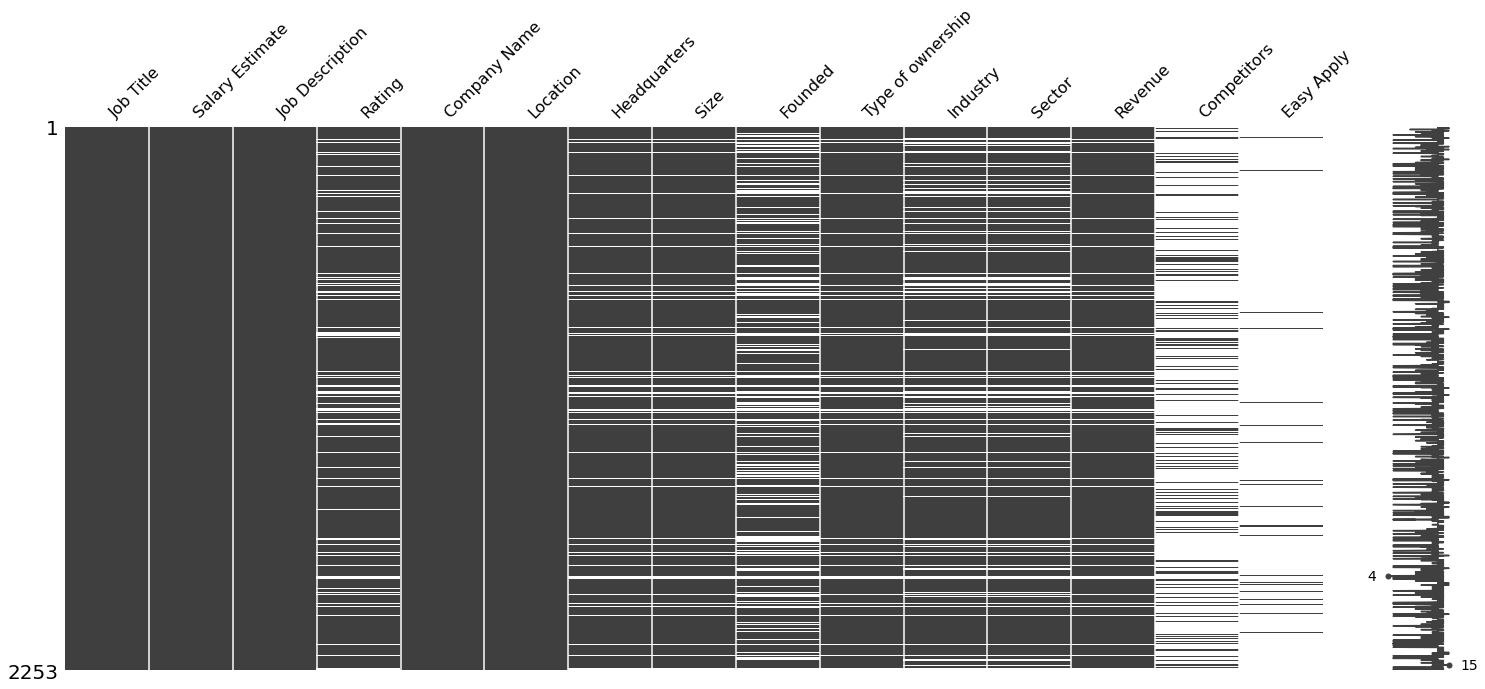

In [21]:
msno.matrix(data)

Create Job Title Data Frame

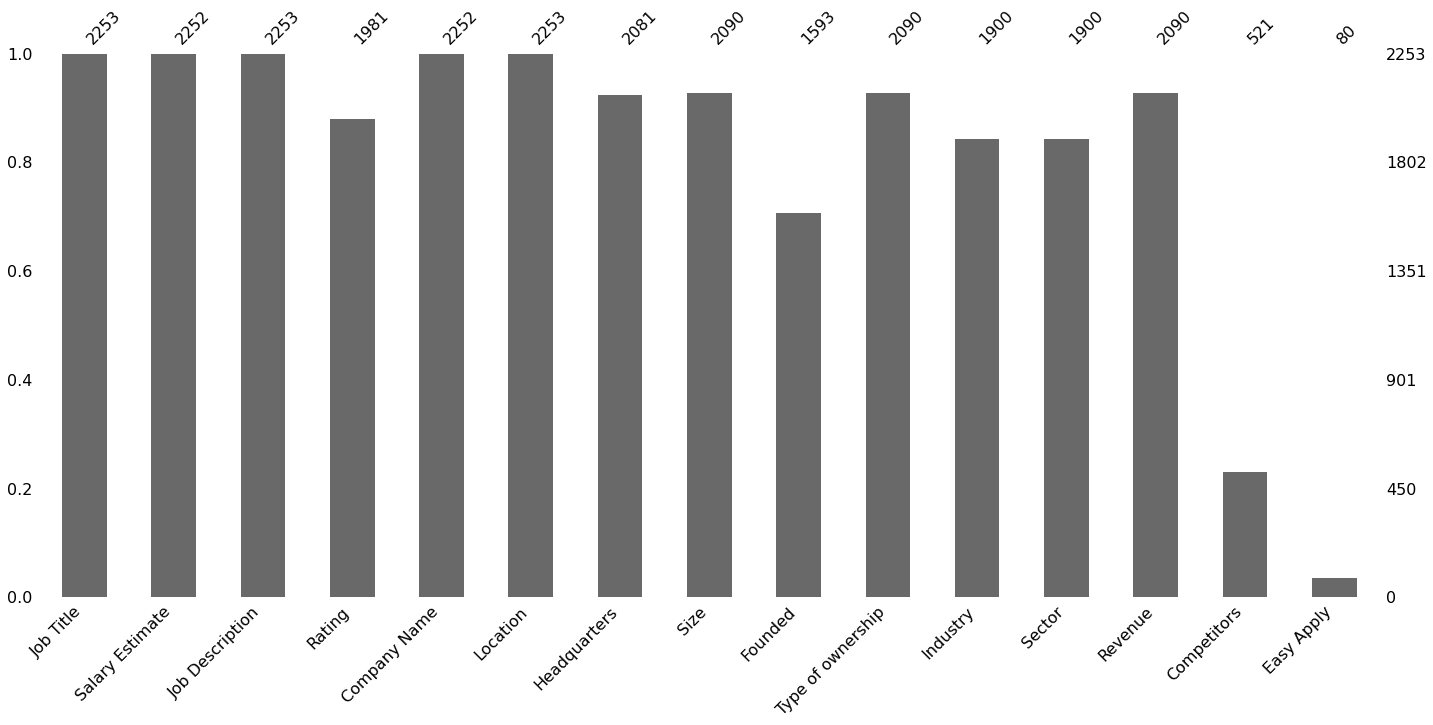

In [22]:
msno.bar(data)

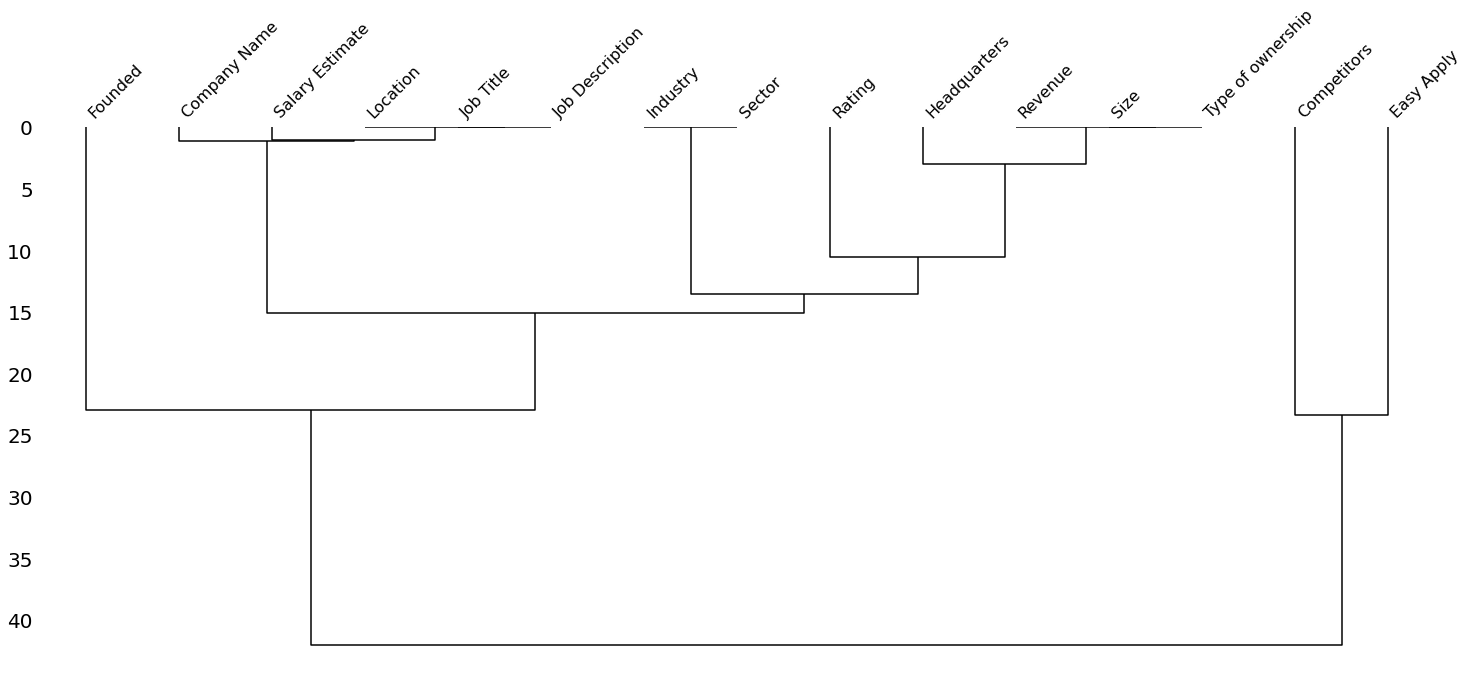

In [23]:
msno.dendrogram(data)

In [6]:
jobTitle=pd.DataFrame(data,columns=['Job Title'])

In [5]:
jobTitle2=pd.DataFrame(data,columns=['Job Title'])

In [6]:
jobTitle2[jobTitle2['Job Title'].str.count('^[Dd]ata Analyst')>0]

,Job Title
0,"Data Analyst, Center on Immigration and Justic..."
3,Data Analyst
5,Data Analyst
8,Data Analyst
9,"Data Analyst, Merchant Health"
...,...
2230,Data Analyst-(Remote- All across US)
2234,"Data Analyst 3, Customer Experience - Centennial"
2243,Data Analyst-(Remote- All across
2245,Data Analyst Supporting the DEA #20-242


In [33]:
title2 = re.findall(r'^[Dd]ata Analyst', jobTitle2['Job Title'])

TypeError: ignored

In [28]:
words=jobTitle2['Job Title']
for i in words:
  print(i)

Data Analyst, Center on Immigration and Justice (CIJ)
Quality Data Analyst
Senior Data Analyst, Insights & Analytics Team [Customer Operations]
Data Analyst
Reporting Data Analyst
Data Analyst
Business/Data Analyst (FP&A)
Data Science Analyst
Data Analyst
Data Analyst, Merchant Health
Data Analyst
Data Analyst
DATA ANALYST
Senior Data Analyst
Investment Advisory Data Analyst
Sustainability Data Analyst
Data Analyst
Clinical Data Analyst
DATA PROGRAMMER/ANALYST
Data Analyst
Product Analyst, Data Science
Data Science Analyst
Data Analyst - Intex Developer
Data Analyst
Entry Level / Jr. Data Analyst
Data Analyst
Data + Business Intelligence Analyst
Data Analyst, Product
Data Analyst Entry Level
Data Analyst
Data Analyst
Data Analyst
Data Analyst
Data Science Analyst, Capital Markets
Data Analyst (Games)
Analyst/Associate Global Markets Credit Data Analyst
Data Business Analyst
Data Analyst with Excel/DAX/ PowerBI experience- Fulltime
Data Science Analyst/Engineer
Data Analyst
Business Ana

In [30]:
jobTitle2['Job Title'],jobTitle2['Job Title Back']=jobTitle2['Job Title'].str.split('^[Dd]ata Analyst',1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [31]:
jobTitle2

,Job Title,Job Title Back
0,,", Center on Immigration and Justice (CIJ)"
1,Quality Data Analyst,NaN
2,"Senior Data Analyst, Insights & Analytics Team...",NaN
3,,
4,Reporting Data Analyst,NaN
...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,NaN
2249,Senior Data Analyst (Corporate Audit),NaN
2250,"Technical Business Analyst (SQL, Data analytic...",NaN
2251,,"3, Customer Experience"


In [7]:
jobTitle

,Job Title
0,"Data Analyst, Center on Immigration and Justic..."
1,Quality Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team..."
3,Data Analyst
4,Reporting Data Analyst
...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...
2249,Senior Data Analyst (Corporate Audit)
2250,"Technical Business Analyst (SQL, Data analytic..."
2251,"Data Analyst 3, Customer Experience"


Split Title with Comma

In [1]:
def hyphen_split(a):
    if a.count("-") == 1:
        return a.split("-")[0]
    return "-".join(a.split("-", 2)[:2])

In [17]:
jobTitle['Job Title']=jobTitle['Job Title'].str.replace('\d+','')

In [19]:
jobTitle['Job Title']

0                                 data analyst
1                         quality data analyst
2                          senior data analyst
3                                 data analyst
4                       reporting data analyst
                         ...                  
2248    rqs - ihha -  -q data security analyst
2249     senior data analyst (corporate audit)
2250           technical business analyst (sql
2251                             data analyst 
2252               senior quality data analyst
Name: Job Title, Length: 2253, dtype: object

In [8]:
jobTitle['Job Title'],jobTitle['Job Title 2']=jobTitle['Job Title'].str.split(',', 1).str

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



In [18]:
jobTitle

,Job Title,Job Title 2
0,data analyst,Center on Immigration and Justice (CIJ)
1,quality data analyst,NaN
2,senior data analyst,Insights & Analytics Team [Customer Operations]
3,data analyst,NaN
4,reporting data analyst,NaN
...,...,...
2248,rqs - ihha - -q data security analyst,NaN
2249,senior data analyst (corporate audit),NaN
2250,technical business analyst (sql,"Data analytics, ETL)"
2251,data analyst,Customer Experience


In [15]:
jobTitle['Job Title']=jobTitle['Job Title'].str.lower()

In [16]:
print(jobTitle['Job Title'].unique())

['data analyst' 'quality data analyst' 'senior data analyst'
 'reporting data analyst' 'business/data analyst (fp&a)'
 'data science analyst' 'investment advisory data analyst'
 'sustainability data analyst' 'clinical data analyst'
 'data programmer/analyst' 'product analyst'
 'data analyst - intex developer' 'entry level / jr. data analyst'
 'data + business intelligence analyst' 'data analyst entry level'
 'data analyst (games)'
 'analyst/associate global markets credit data analyst'
 'data business analyst'
 'data analyst with excel/dax/ powerbi experience- fulltime'
 'data science analyst/engineer' 'business analyst'
 'behavioral data analyst' 'data analyst -1+ year contract - nyc'
 'advertising data analyst' 'market data reporting analyst'
 'senior analyst' 'office of the cao | reference data'
 'business data analyst' 'data scientist / big data analytics analyst'
 'data reporting analyst' 'principal data analyst' 'data analyst ii'
 'data analyst - environmental'
 'data analyst - d

In [14]:
print(jobTitle['Job Title'].unique())

AttributeError: ignored

In [11]:
len(jobTitle['Job Title'].unique())

1167

In [12]:
onlyEngTitle = jobTitle['Job Title'].str.replace(',','').str.replace('#','').str.extract('([a-zA-Z ]+)')[0].str.lower().str.len()